# Exercise 2

Work on this before the next lecture on 12 April. We will talk about questions, comments, and solutions during the exercise after the third lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to your GitHub repository for this course before the next lecture starts and post a link to your repository in [this thread](https://github.com/wildtreetech/advanced-computing-2018/issues/3). If you worked on things together with others please add their names to the notebook so we can see who formed groups.

In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

# Question 1

Build your own random forest classifier! Using the `DecisionTreeClassifier` from scikit-learn (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) construct your own `RandomForestClassifier`.

There are two methods for adding randomisation to the tree growing process:

* grow each tree on a bootstrap sample of the data
* configure each tree to select a subset of features for each split

Try out your new `RandomForestClassifier` on the https://archive.ics.uci.edu/ml/datasets/bank+marketing dataset.

**Note:** To test your classifier it is a good idea to use a smaller dataset like the `make_blobs` from the lecture. It will run much faster and be easier to debug.

* Can you show that a forest of trees that are all the same performs like a single decision tree?
* Can you compute the correlation coefficient between scores assigned by two different trees in the forest? In order to gain from buildign a forest you want your trees to not be 100% correlated. Experiment with the different randomisation strategies to check that they work.

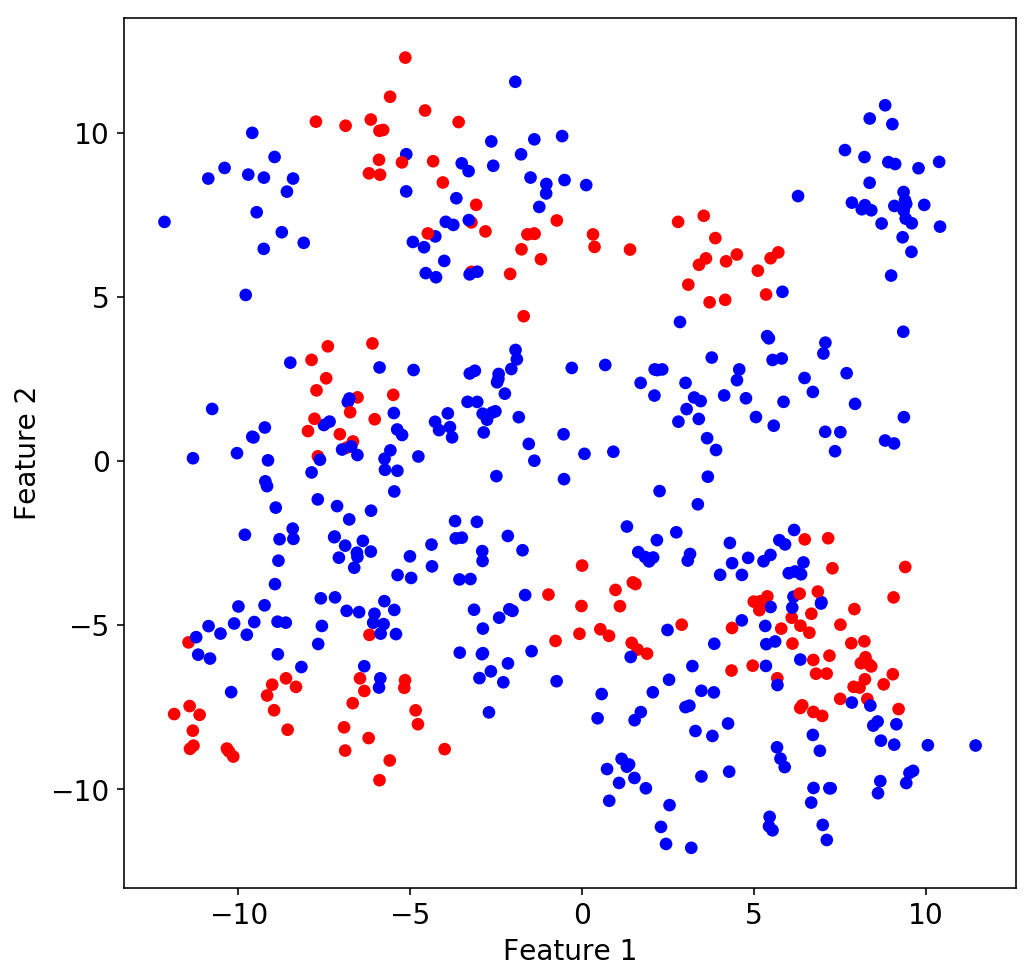

In [3]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
import sys
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state
from utils import plot_surface
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.utils import check_random_state
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

labels = ['b', 'r']
X_, y_ = make_blobs(n_samples=500, centers=35, random_state=100)
y_ = np.take(labels, (y_ < 10))
plt.scatter(X_[:, 0], X_[:, 1], c=y_, lw=0, s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2");
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_)
dec = DecisionTreeClassifier(max_depth=200)
#dec.fit(X_train_, y_train_)
#plot_surface(dec, X_, y_)

class newForestClassifier:
    
    def fit(X,y,n_estimator,random):
        trees=[]
        list_ind=[]
        ratio=1/n_estimator
        dtc = DecisionTreeClassifier()
        x_tree, y_tree, ind = random(X, y, ratio)
        dtc.fit(x_tree, y_tree)       
        trees.append(dtc)
        list_ind.append(ind)
        return trees, list_ind


myforest = newForestClassifier()










# Question 2

Use the ready made `RandomForestClassifier` from scikit-learn to create the best model you can for the Bank Marketing dataset. Use `GridSearchCV` (or any other method) to tune your model and possible pre-processing steps. Make sure you have a test set to use after you are done tuning to estimate your generalisation error.

In [4]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

mydata = pd.read_csv("bank/bank-full.csv",  sep=';')
X = mydata.as_matrix()[:, :-1]
y = mydata.as_matrix()[:,-1]
mystring = [1, 2, 3, 4, 6, 7, 8, 10, 15]
k = LabelEncoder().fit(y)
y = k.transform(y)
for i in mystring:
    k = LabelEncoder().fit(X[:,i])
    X[:,i] = k.transform(X[:,i])
    
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

foret_noire = RandomForestClassifier()

number_estimators = {'n_estimators': [5, 10, 20, 50]}
grid = GridSearchCV(estimator=foret_noire, param_grid=number_estimators)
grid.fit(X_train,y_train)
train_score = grid.score(X_train, y_train)
test_score = grid.score(X_test,y_test)
print("Train Score = " + repr(train_score))
print("Test Score = " + repr(test_score))
print(grid.best_params_)
        

/Users/pietrzyk/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Train Score = 0.9996018579960185
Test Score = 0.9034769530213218
{'n_estimators': 50}


# Question 3

Compare the feature importances calculated by a `RandomForestClassifier`, `ExtraTreesClassifier` and `GradientBoostedTreesClassifier` on the california housing dataset. You might have to tune `n_estimators` and other hyper-parameters to get good performance.

Plot each of the features as a scatter plot with the target to learn about each variable. You can also make a plot of two features and use the target as colour.

Fit a model and tune the model complexity using a training and test data set.

Explore the feature importances and partial dependences that are important to the house price.

/Users/pietrzyk/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Random Forest Score = 0.702906976744186
Extra Trees Score = 0.7060077519379845
Extra Trees Score = 0.7030038759689923


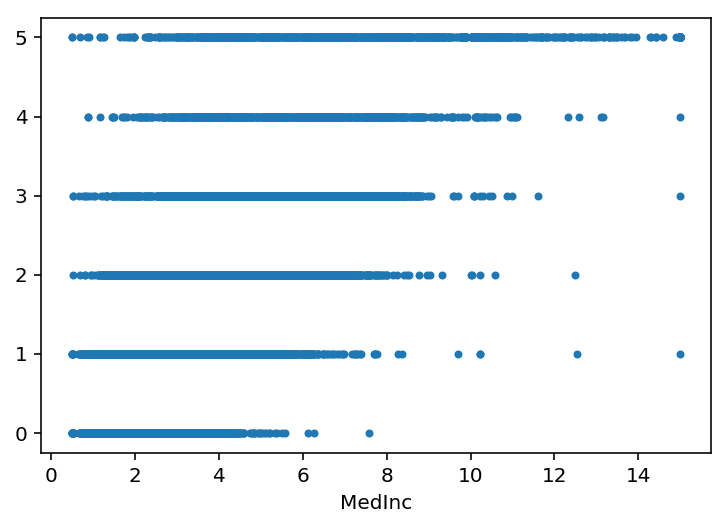

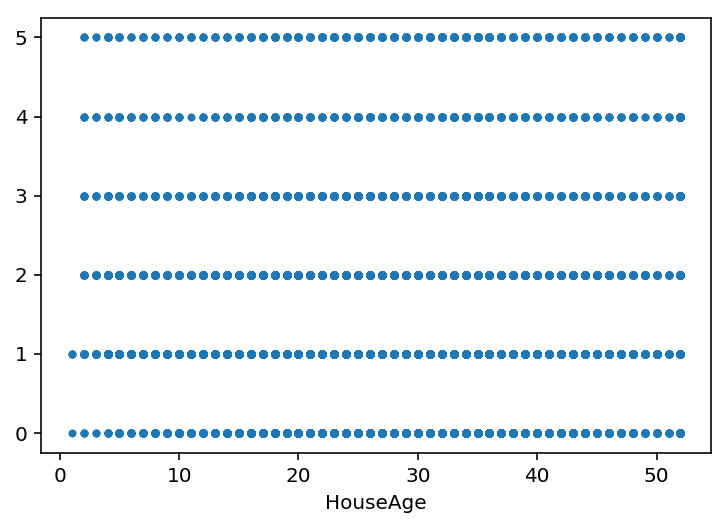

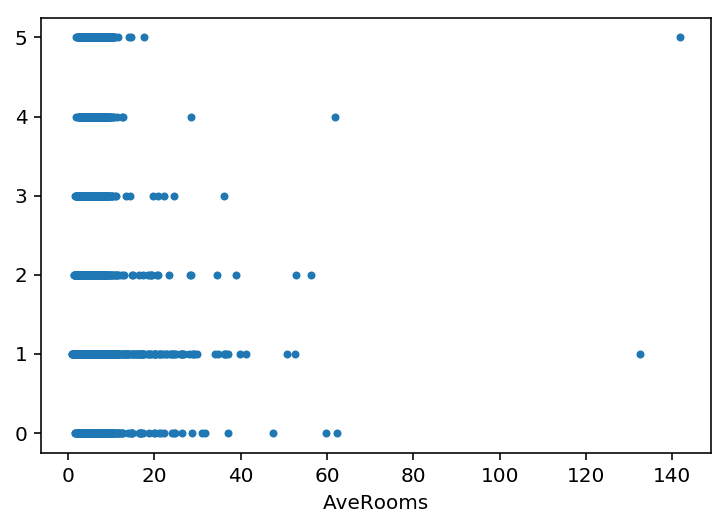

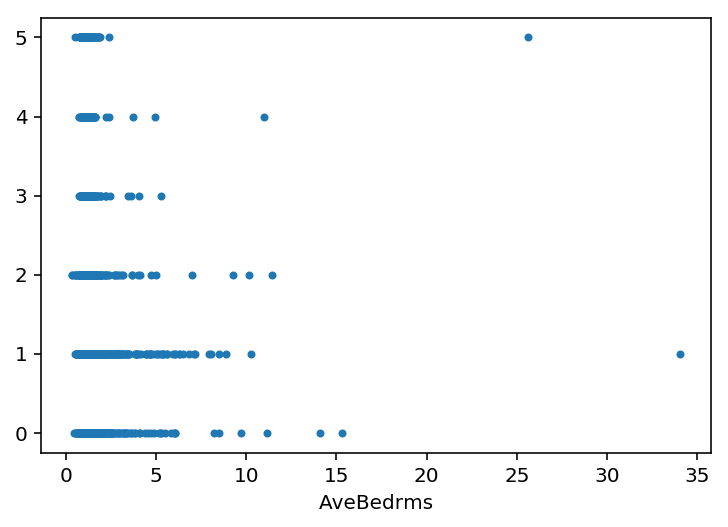

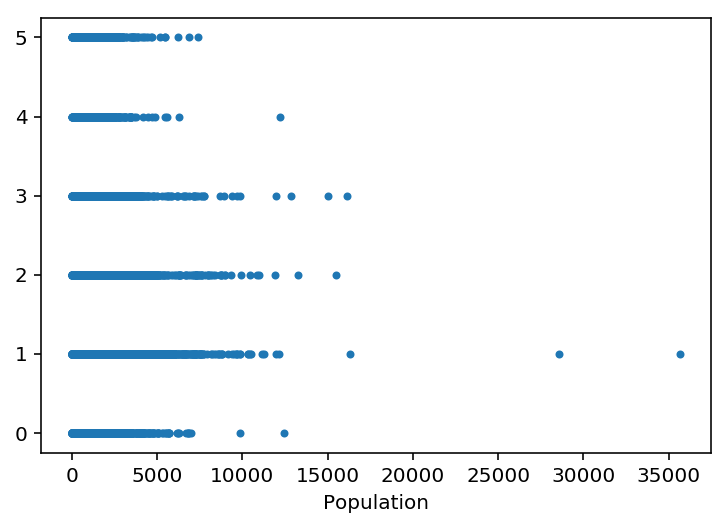

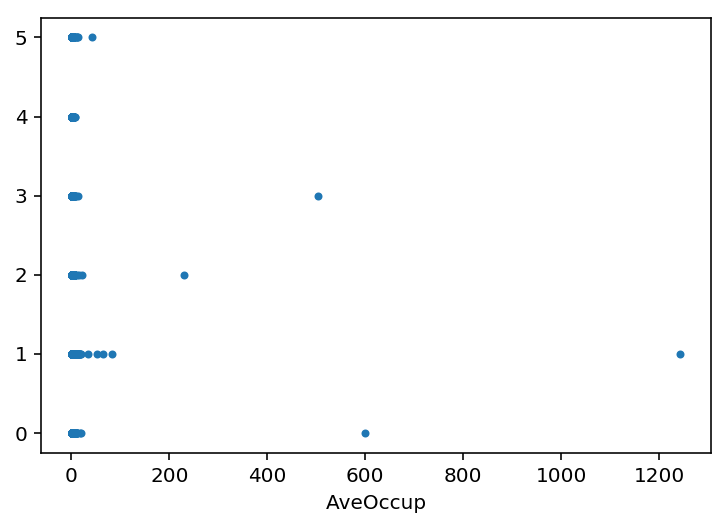

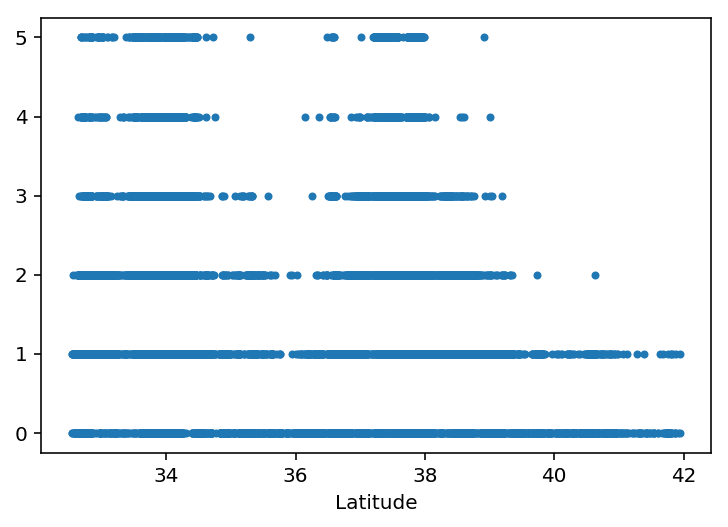

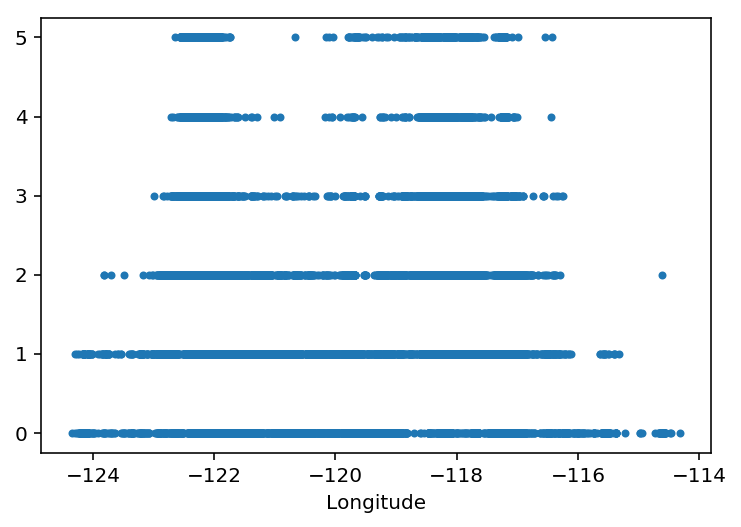

In [19]:
from sklearn.datasets.california_housing import fetch_california_housing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


cal_housing = fetch_california_housing()

X = cal_housing.data
y = cal_housing.target.astype("int")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

rfc = RandomForestClassifier(n_estimators=200)
etc = ExtraTreesClassifier(n_estimators=200)
gbc = GradientBoostingClassifier(n_estimators=200)

grid_rfc = GridSearchCV(estimator=rfc, param_grid={'n_estimators': [5, 10, 20, 50, 200]})
grid_rfc.fit(X_train, y_train)
grid_rfc_score = grid_rfc.score(X_test, y_test)
print("Random Forest Score = " + repr(grid_rfc_score))

etc.fit(X_train, y_train)
etc_score = etc.score(X_test, y_test)
print("Extra Trees Score = " + repr(etc_score))

gbc.fit(X_train, y_train)
gbc_score = gbc.score(X_test, y_test)
print("Extra Trees Score = " + repr(gbc_score))

for i in range(X.shape[1]):
    plt.figure()
    plt.plot(X[:,i],y,".")
    plt.xlabel(cal_housing.feature_names[i])
    plt.show()





# Question 4

Competition time! Use any model you want (and understand) to make the best model you can to predict the target in the below dataset.

Each student's submission will be ranked by:
* their performance (using [AUC ROC](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) as metric) and
* how well they did at predicting their generalisation error.

Your final rank will be the average of your two ranks.

To evaluate how good you did at predicting your generalisation error Tim will release a fresh test data set after the hand-in deadline. You can then re-run your trained classifier on that data and score its performance. We will rank students by the difference between that score and their predicted score.

You can read in the data using the `pandas` library. The final column of the file contains the target (zero or one).

In [ ]:
import pandas as pd

# you might have to adjust the path to the dataset
df_train = pd.read_csv("../../data/challenge-train.csv", header=None)
df_train.head()

In [ ]:
# convert the pandas dataframe to a numpy array
# make sure you do not include the final column
# in your training data (X) but store it as target (y)
X = df_train.as_matrix()[:, :-1]
y = df_train.as_matrix()[:, -1]

In [ ]:
X.shape

In [ ]:
y.shape